In [91]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import xarray as xr 
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


<xarray.Dataset> Size: 15kB
Dimensions:  (time: 730)
Coordinates:
  * time     (time) datetime64[ns] 6kB 2022-01-01T12:00:00 ... 2023-12-31T12:...
Data variables:
    tcwv     (time) float32 3kB ...
    tcc      (time) float32 3kB ...
    tp       (time) float32 3kB ...
Attributes:
    description:    Merged ERA5 and MODIS AOD dataset
    creation_date:  2024-12-29
    time_zone:      UTC
    region:         51E-52E, 35N-36N


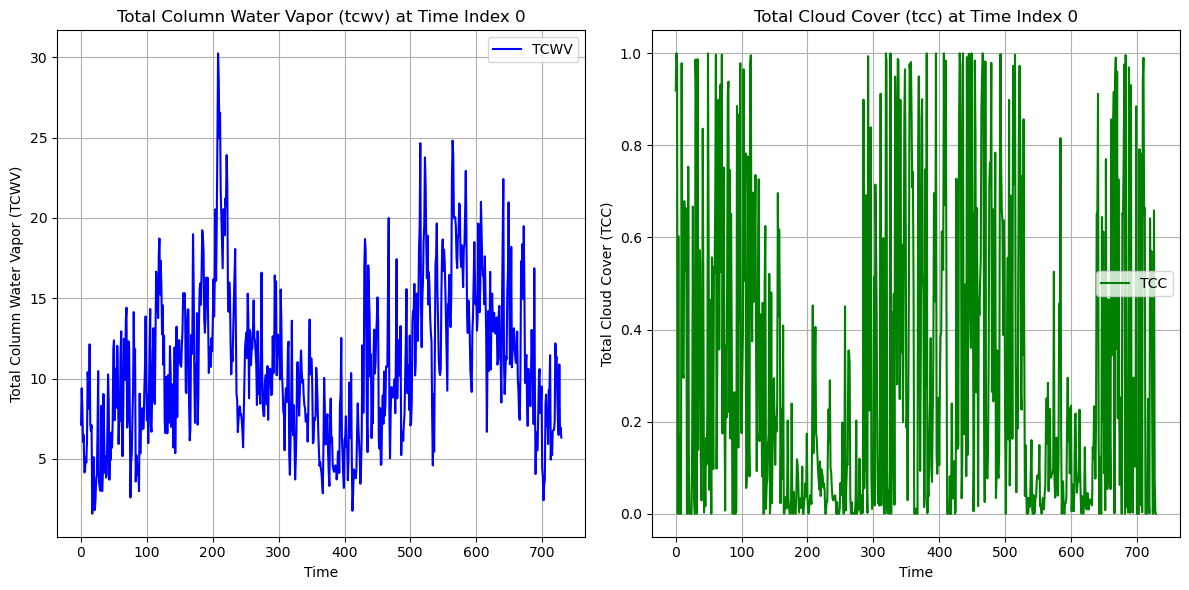

In [92]:
# Load the NetCDF dataset
file_path = 'dataset_precip.nc' 
ds = xr.open_dataset(file_path)

# Check the available variables in the dataset
print(ds)

# Extracting the relevant variables
tcwv = ds['tcwv'].values  # Total Column Water Vapor
tcc = ds['tcc'].values  # Total Cloud Cover
tp = ds['tp'].values  # Precipitation (target variable)

# Convert tp from meters to millimeters
tp = tp * 1000  # Convert from meters to millimeters

# Plotting a sample of the data for visualization
# Let's plot the data for the first time point (time = 0)

plt.figure(figsize=(12, 6))

# Plot for Total Column Water Vapor (tcwv) at time index 0
plt.subplot(1, 2, 1)
plt.title('Total Column Water Vapor (tcwv) at Time Index 0')
plt.plot(tcwv, label='TCWV', color='blue')
plt.xlabel('Time')
plt.ylabel('Total Column Water Vapor (TCWV)')
plt.grid(True)
plt.legend()

# Plot for Total Cloud Cover (tcc) at time index 0
plt.subplot(1, 2, 2)
plt.title('Total Cloud Cover (tcc) at Time Index 0')
plt.plot(tcc, label='TCC', color='green')
plt.xlabel('Time')
plt.ylabel('Total Cloud Cover (TCC)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [93]:


# Flatten the arrays to make them compatible for model training
X = np.vstack((tcwv.flatten(), tcc.flatten())).T  # Features: tcwv and tcc
y = tp.flatten()  # Target: tp (precipitation)

# Normalize the features and the target variable
scaler = StandardScaler()
X = scaler.fit_transform(X)  # Normalizing features
y = scaler.fit_transform(y.reshape(-1, 1)).flatten()  # Normalizing target


In [94]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=77)

# Fitting Support Vector Regression (SVR) to the Training set
regressor = SVR(kernel='rbf')  # Using Radial Basis Function (RBF) kernel for SVR
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating the model using Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.45102745210776984


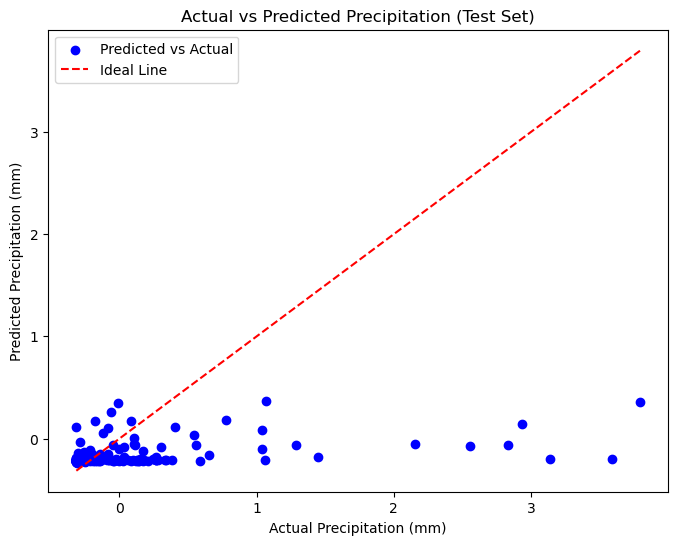

In [95]:
# Plotting actual vs predicted precipitation
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Line')
plt.title('Actual vs Predicted Precipitation (Test Set)')
plt.xlabel('Actual Precipitation (mm)')
plt.ylabel('Predicted Precipitation (mm)')
plt.legend()
plt.show()


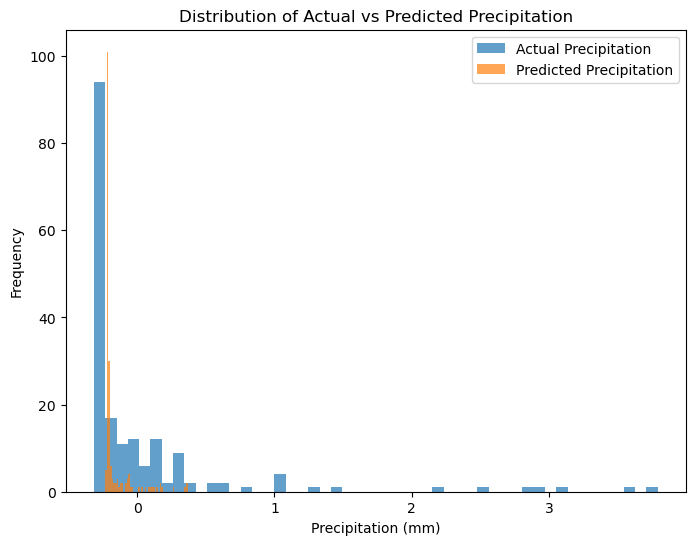

In [96]:
# Plotting the distribution of actual and predicted precipitation
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=50, alpha=0.7, label='Actual Precipitation')
plt.hist(y_pred, bins=50, alpha=0.7, label='Predicted Precipitation')
plt.title('Distribution of Actual vs Predicted Precipitation')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.legend()
plt.show()
